In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving retail.xlsx to retail.xlsx


In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel('retail.xlsx')

# Display the first few rows
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,10001,85123A,White Mug,6,2024-01-01 10:00:00.000,3.50,12345,United Kingdom
1,10002,71053,Blue Pen,12,2024-01-02 09:59:59.995,1.25,12346,United Kingdom
2,10003,84406B,Red Notebook,3,2024-01-03 09:59:59.995,2.50,12347,Germany
3,10004,84029G,Glass Bottle,8,2024-01-04 09:59:59.995,5.00,12345,United Kingdom
4,10005,20725,Candle Set,2,2024-01-05 09:59:59.995,8.75,12348,France


In [ ]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Ensure CustomerID is treated as string
df['CustomerID'] = df['CustomerID'].astype(str)

# Remove returns (Quantity < 0)
df = df[df['Quantity'] > 0]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# 1. Drop missing and negative values
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]
df['CustomerID'] = df['CustomerID'].astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 2. Add TotalPrice column ✅
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 3. Create RFM table
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'MonetaryValue'
})


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [ ]:
from sklearn.cluster import KMeans

# Let's try 4 clusters (can adjust later)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()


,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12345,1,3,86.50,2
12346,4,2,24.90,0
12347,2,2,27.45,0
12348,6,1,17.50,1
12349,5,1,9.99,1


from matplotlib import pyplot as plt
_df_0['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MonetaryValue'].plot(kind='hist', bins=20, title='MonetaryValue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('CustomerID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Frequency', y='MonetaryValue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='MonetaryValue', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['MonetaryValue'].plot(kind='line', figsize=(8, 4), title='MonetaryValue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['CustomerID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Recency', y='CustomerID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['CustomerID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Frequency', y='CustomerID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['CustomerID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='MonetaryValue', y='CustomerID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['CustomerID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Cluster', y='CustomerID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f'Silhouette Score: {score:.2f}')


Silhouette Score: 0.33


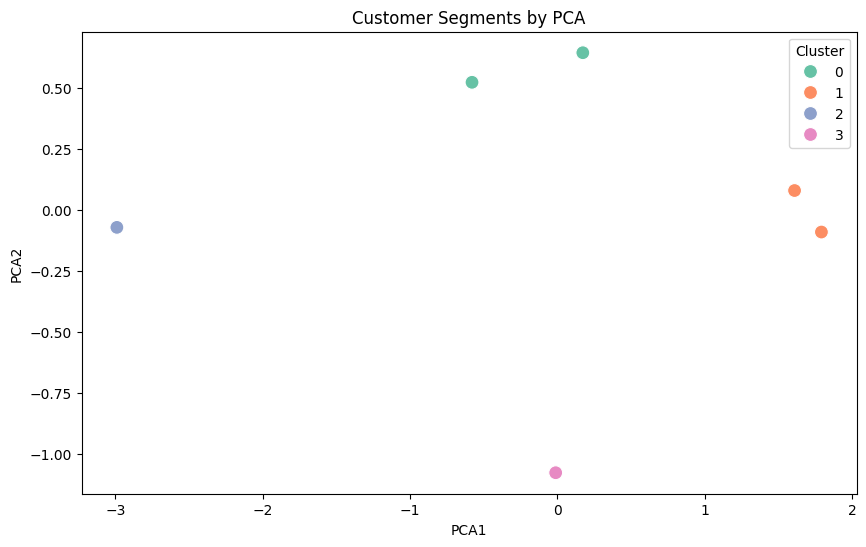

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dimensions to 2 for plotting
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

rfm['PCA1'] = pca_components[:, 0]
rfm['PCA2'] = pca_components[:, 1]

# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments by PCA')
plt.show()


In [ ]:
rfm.to_csv('clustered_customers.csv')
files.download('clustered_customers.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>